## Non-linear ODE: Shooting Method using Python
###  Blasius' boundary layer equation in fluid dynamics
The nonolinear third-order ODE 
$$ 2\frac{d^3f}{d\eta^3} + f\frac{d^2 f}{d\eta^2} = 0, \quad 0<\eta < \infty $$
with boundary condition
$$ f(0) = 0, \frac{df}{d\eta}(0) = 0, \frac{df}{d\eta}(\infty) = 1 ,$$
is a classical problem in fluid dynamics. From the solution $ f(\eta) $, the velocity components $ u(x,y)(m/s) $ and $ v(x,y)(m/s) $ of the stream close to a plane wall can be computed:
$$ u(x,y) = u_{\infty}\frac{df}{d\eta}(\eta), \quad v(x,y) = \sqrt{\frac{\nu u_\infty}{4x}}(\eta\frac{df}{d\eta}(\eta)-f(\eta)), \quad \eta = y\sqrt{\frac{u_\infty}{\nu x}} $$
	where $ u_\infty (m/s) $ is the free stream velocity far from the wall and $ \nu (m^2/s) $ is the kinematic viscosity. Observe that one of the BCs is given at $ \eta = \infty $.
#### Shooting method,
The Blasius' equation can be formulated as a first-order system of ODEs. Let $ u_1 = f, u_2 = f' $ and $ u_3 = f'' $
\begin{align*}
\frac{du_1}{d\eta} & = u_2, \quad u_1(0) = 0 \\
\frac{du_2}{d\eta} & = u_3, \quad u_2(0) = 0  \\
\frac{du_3}{d\eta} & = -\frac 12 u_1u_3, \quad u_3(0)= s
\end{align*}
where $ s $, the shooting parameter is to be computed so that $ u_2(s, L) = 1, $ where $ L $ is large number.

#### Python Implimentation

In [1]:
#important modules
import sys
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# We use Runge kutta order four for solving the sistem
def RungeKutta4(f, a, L, u, N):
    """
    A function for  numerical solution using RK4
    Imputs:
    =======
    f : the right side fucntion of the system of ODE
    a : eta = a in the domain interval [a, L]
    L : eta = L 
    u : the initial condition
    N : number of grid points
    Returns:
    ========
    grid points
    numerical solution
    """
    h = (L - a) / N   # step size
    result = []       # empty list for storing the numerical solution
    grid = []         # empty list for storing the grid points
    result.append(u)
    grid.append(a)
    x = a
    for i in range(1, N + 1):       # implementation of RK4 algorithm
        k1 = f(x, u)
        k2 = f(x + h / 2, u + h * k1 / 2)
        k3 = f(x + h / 2, u + h * k2 / 2)
        k4 = f(x + h, u + h * k3)
        u = u + h * (k1 + 2 * k2 + 2 * k3 + k4)/6
        x = x + h
        result.append(u)
        grid.append(x)
    return np.array(grid), np.array(result)

In [3]:
# initial condition with the shooting parameter s,
def u0(s):
    return np.array([0, 0, s])

In [4]:
# F(s) = u_2(s, L) - 1
def F(s, L):
    u = u0(s)
    grid, result = RungeKutta4(f, a, L, u, N)
    #y = result[len(result)-2] #?
    F = (result[len(result)-2])[1] - b
    return F

In [5]:
#formulate as a first-order system and  define the right side function for the nonlinear ode
def f(t, u):
    f = np.zeros(3)
    f[0] = u[1]
    f[1] = u[2]
    f[2] = -0.5 * u[0] * u[2]
    return f

In [6]:
# the secant method for solving the algebric equation F(s) = 0
def Secant(F, s0, s1, eps, L):
    global s
    F0 = F(s0, L)
    F1 = F(s1, L)
    iteration_counter = 0

    while abs(F1) > eps and iteration_counter < 100:
        try:
            denominator = (F1 - F0) / (s1 - s0)
            s = s1 - F1 / denominator
        except ZeroDivisionError:
            print('Error! - denominator zero for s =', s1)
            sys.exit(1)  # Abort with error
        s0 = s1
        s1 = s
        F0 = F1
        F1 = F(s1, L)
        iteration_counter = iteration_counter + 1
    # here, either a solution is found or too many iterations
    if abs(F(s,L)) > eps:
        iteration_counter = -1
    return s, iteration_counter

In [7]:
# Parameters
a = 0
b = 1
L = 6
N = 100

# initializing the parameter s, and set the tollerance eps
s0 = 1.0
s1 = 2.0
eps = 1.0e-6
s, no_iterations = Secant(F, s0, s1, eps, L)
print('s =', s)
print('number of iteration = ', no_iterations)

s = 0.3326416586182387
number of iteration =  6


In [8]:
# Now we use the approperaite shooting parameter in the initial condition and solve for the system of ODE
u = u0(s)
grid, result = RungeKutta4(f, a, L, u, N)

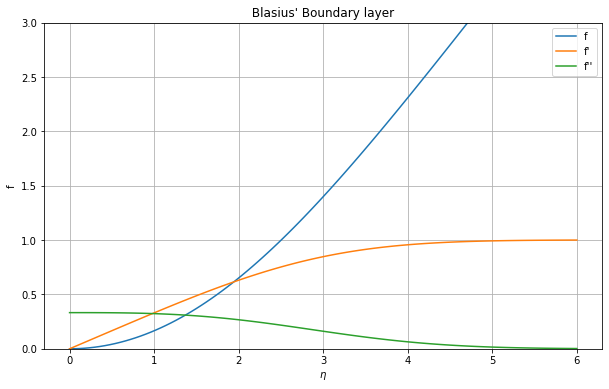

In [9]:
# Ploting the results
plt.figure(figsize=(10, 6))
plt.plot(grid, result[:, 0],  grid,  result[:, 1],  grid, result[:, 2])
plt.xlabel('$\eta$')
plt.ylabel("f")
plt.ylim([0,3])
plt.grid(True)
plt.title(" Blasius' Boundary layer ")
plt.legend(['f', "f'", "f''"])
plt.savefig('Shooting.png')
plt.show()

#### Comparing  result for  different values of $ L $  (say $ L = 1, 3, 6, 16 $) and check the convergence of the $ f(\eta) $- curve.

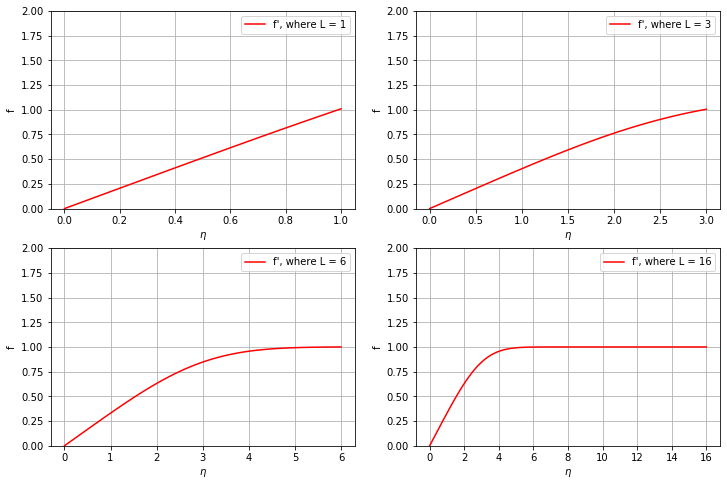

In [10]:
Ls = [1, 3, 6, 16]
ss = []
no_iterationss = []
results = []
plt.figure(figsize=(12, 8))
for l in range(0,len(Ls)):    
    s, it =  Secant(F, s0, s1, eps, Ls[l])
    ss.append(s)
    no_iterationss.append(it)
    u = u0(s)
    grid, result = RungeKutta4(f, a, Ls[l], u, N)
    results.append(result)  # here we store the solution of f for different value of L
    plt.subplot(2, 2, l+1)
    plt.plot(grid, result[:, 1],'r')
    plt.xlabel('$\eta$')
    plt.ylabel("f")
    plt.ylim([0,2])
    plt.grid(True)    
    plt.legend(["f', where L = "+ str(Ls[l])])

plt.show()   
